In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization library
import matplotlib.pyplot as plt # visualization library
import plotly.plotly as py # visualization library
from plotly.offline import init_notebook_mode, iplot # plotly offline mode
init_notebook_mode(connected=True) 
import plotly.graph_objs as go # plotly graphical object

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
plt.style.use('ggplot') # style of plots. ggplot is one of the most used style, I also like it.
# Any results you write to the current directory are saved as output.

In [16]:
aerial = pd.read_csv("operations.csv")
weather_station_location = pd.read_csv("Weather Station Locations.csv")
weather = pd.read_csv("Summary of Weather.csv")

C:\Users\Martin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning:

Columns (7,8,11,13,31,43,44) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Martin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning:

Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.



In [6]:
aerial.head()

Mission ID Mission Date Theater of Operations Country Air Force  \
0           1    8/15/1943                   MTO     USA     12 AF   
1           2    8/15/1943                   PTO     USA      5 AF   
2           3    8/15/1943                   MTO     USA     12 AF   
3           4    8/15/1943                   MTO     USA     12 AF   
4           5    8/15/1943                   PTO     USA      5 AF   

         Unit ID Aircraft Series Callsign Mission Type          Takeoff Base  \
0  27 FBG/86 FBG             A36      NaN          NaN  PONTE OLIVO AIRFIELD   
1         400 BS             B24      NaN            1                   NaN   
2  27 FBG/86 FBG             A36      NaN          NaN  PONTE OLIVO AIRFIELD   
3  27 FBG/86 FBG             A36      NaN          NaN  PONTE OLIVO AIRFIELD   
4         321 BS             B24      NaN            1                   NaN   

     ...     Incendiary Devices Weight (Tons) Fragmentation Devices  \
0    ...                                  NaN                   NaN   
1    ...                                  NaN                   NaN   
2    ...                                  NaN                   NaN   
3    ...                                  NaN                   NaN   
4    ...                                  NaN                   NaN   

   Fragmentation Devices Type Fragmentation Devices Weight (Pounds)  \
0                         NaN                                   NaN   
1                         NaN                                   NaN   
2                         NaN                                   NaN   
3                         NaN                                   NaN   
4                         NaN                                   NaN   

  Fragmentation Devices Weight (Tons) Total Weight (Pounds)  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   

  Total Weight (Tons) Time Over Target Bomb Damage Assessment  Source ID  
0                10.0              NaN                    NaN        NaN  
1                20.0              NaN                    NaN     9366.0  
2                 9.0              NaN                    NaN        NaN  
3                 7.5              NaN                    NaN        NaN  
4                 8.0              NaN                    NaN    22585.0  

[5 rows x 46 columns]

In [18]:
aerial.dropna(subset=['Country','Target Longitude','Takeoff Longitude'],inplace = True)

In [20]:
drop_list = ['Mission ID','Unit ID','Target ID','Altitude (Hundreds of Feet)','Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type','Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment','Source ID']
aerial.drop(drop_list, axis=1,inplace = True)
aerial = aerial[ aerial.iloc[:,8]!="4248"] # drop this takeoff latitude 
aerial = aerial[ aerial.iloc[:,9]!=1355]   # drop this takeoff longitude

In [21]:
aerial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2555 entries, 0 to 178080
Data columns (total 17 columns):
Mission Date             2555 non-null object
Theater of Operations    2555 non-null object
Country                  2555 non-null object
Air Force                2505 non-null object
Aircraft Series          2528 non-null object
Callsign                 10 non-null object
Takeoff Base             2555 non-null object
Takeoff Location         2555 non-null object
Takeoff Latitude         2555 non-null object
Takeoff Longitude        2555 non-null float64
Target Country           2499 non-null object
Target City              2552 non-null object
Target Type              602 non-null object
Target Industry          81 non-null object
Target Priority          230 non-null object
Target Latitude          2555 non-null float64
Target Longitude         2555 non-null float64
dtypes: float64(3), object(14)
memory usage: 359.3+ KB


In [22]:
weather_station_location = weather_station_location.loc[:,["WBAN","NAME","STATE/COUNTRY ID","Latitude","Longitude"] ]
weather_station_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
WBAN                161 non-null int64
NAME                161 non-null object
STATE/COUNTRY ID    161 non-null object
Latitude            161 non-null float64
Longitude           161 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.4+ KB


In [23]:
weather = weather.loc[:,["STA","Date","MeanTemp"] ]
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 3 columns):
STA         119040 non-null int64
Date        119040 non-null object
MeanTemp    119040 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.7+ MB



Lets start with basics of visualization that is understanding data.
How many country which attacks
Top 10 aircraft series
Takeoff base locations (Attack countries)
Target locations (If you do not understand methods of pyplot look at my pyplot 
Bombing paths
Theater of Operations
Weather station locations

USA              1895
GREAT BRITAIN     544
NEW ZEALAND       102
SOUTH AFRICA       14
Name: Country, dtype: int64


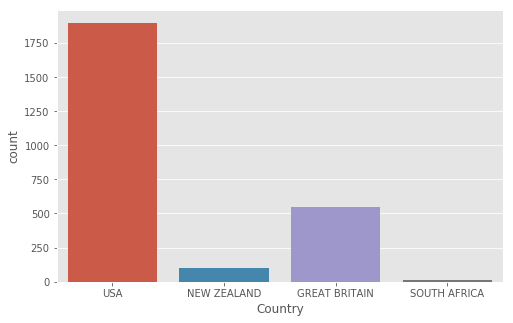

In [30]:
print(aerial['Country'].value_counts())
plt.figure(figsize=(8,5))
sns.countplot(aerial['Country'])
plt.show()

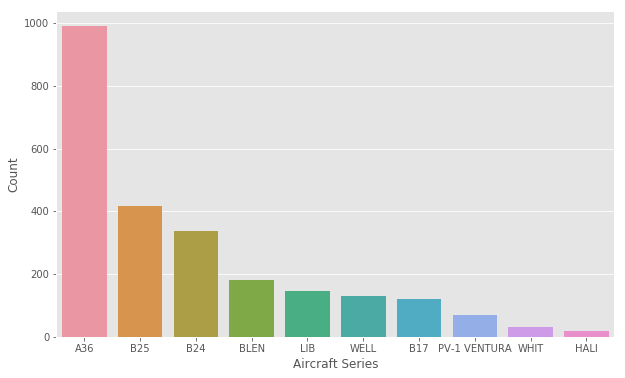

In [76]:
data = aerial.groupby('Aircraft Series').size().sort_values(ascending = False)
data = data[:10]
data = pd.DataFrame(data)
plt.figure(figsize=(10,6))
sns.barplot(x=data.index,y=0,data = data)
plt.ylabel('Count')
plt.show()

In [77]:
# ATTACK
aerial["color"] = ""
aerial.color[aerial.Country == "USA"] = "rgb(0,116,217)"
aerial.color[aerial.Country == "GREAT BRITAIN"] = "rgb(255,65,54)"
aerial.color[aerial.Country == "NEW ZEALAND"] = "rgb(133,20,75)"
aerial.color[aerial.Country == "SOUTH AFRICA"] = "rgb(255,133,27)"

data = [dict(
    type='scattergeo',
    lon = aerial['Takeoff Longitude'],
    lat = aerial['Takeoff Latitude'],
    hoverinfo = 'text',
    text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 10 ,
        line = dict(width=1,color = "white"),
        color = aerial["color"],
        opacity = 0.7),
)]
layout = dict(
    title = 'Countries Take Off Bases ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='Mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice f

In [78]:
# Bombing paths
airports = [ dict(
        type = 'scattergeo',
        lon = aerial['Takeoff Longitude'],
        lat = aerial['Takeoff Latitude'],
        hoverinfo = 'text',
        text = "Country: " + aerial.Country + " Takeoff Location: "+aerial["Takeoff Location"]+" Takeoff Base: " + aerial['Takeoff Base'],
        mode = 'markers',
        marker = dict( 
            size=5, 
            color = aerial["color"],
            line = dict(
                width=1,
                color = "white"
            )
        ))]

targets = [ dict(
        type = 'scattergeo',
        lon = aerial['Target Longitude'],
        lat = aerial['Target Latitude'],
        hoverinfo = 'text',
        text = "Target Country: "+aerial["Target Country"]+" Target City: "+aerial["Target City"],
        mode = 'markers',
        marker = dict( 
            size=1, 
            color = "red",
            line = dict(
                width=0.5,
                color = "red"
            )
        ))]
        

flight_paths = []
for i in range( len( aerial['Target Longitude'] ) ):
    flight_paths.append(
        dict(
            type = 'scattergeo',
            lon = [ aerial.iloc[i,9], aerial.iloc[i,16] ],
            lat = [ aerial.iloc[i,8], aerial.iloc[i,15] ],
            mode = 'lines',
            line = dict(
                width = 0.7,
                color = 'black',
            ),
            opacity = 0.6,
        )
    )
    
layout = dict(
    title = 'Bombing Paths from Attacker Country to Target ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='Mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
    
fig = dict( data=flight_paths + airports+targets, layout=layout )
iplot( fig )

MTO            1802
CBI             425
PTO             247
ETO              44
EAST AFRICA      37
Name: Theater of Operations, dtype: int64


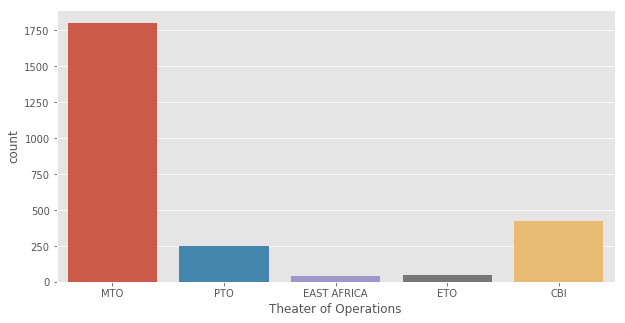

In [82]:
print(aerial['Theater of Operations'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(aerial['Theater of Operations'])
plt.show()

In [83]:
data = [dict(
    type='scattergeo',
    lon = weather_station_location.Longitude,
    lat = weather_station_location.Latitude,
    hoverinfo = 'text',
    text = "Name: " + weather_station_location.NAME + " Country: " + weather_station_location["STATE/COUNTRY ID"],
    mode = 'markers',
    marker=dict(
        sizemode = 'area',
        sizeref = 1,
        size= 8 ,
        line = dict(width=1,color = "white"),
        color = "blue",
        opacity = 0.7),
)]
layout = dict(
    title = 'Weather Station Locations ',
    hovermode='closest',
    geo = dict(showframe=False, showland=True, showcoastlines=True, showcountries=True,
               countrywidth=1, projection=dict(type='Mercator'),
              landcolor = 'rgb(217, 217, 217)',
              subunitwidth=1,
              showlakes = True,
              lakecolor = 'rgb(255, 255, 255)',
              countrycolor="rgb(5, 5, 5)")
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



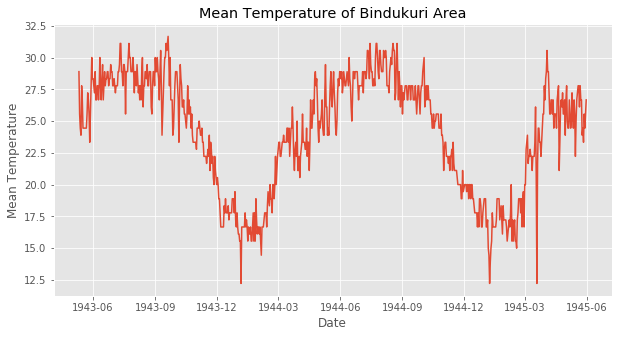

In [94]:
weather_station_id = weather_station_location[weather_station_location.NAME == "BINDUKURI"].WBAN 
weather_bin = weather[weather.STA == 32907]
weather_bin["Date"] = pd.to_datetime(weather_bin["Date"])
plt.figure(figsize=(10,5))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

In [101]:
aerial = pd.read_csv("operations.csv")
aerial["year"] = [ each.split("/")[2] for each in aerial["Mission Date"]]
aerial["month"] = [ each.split("/")[0] for each in aerial["Mission Date"]]
aerial = aerial[aerial["year"]>="1943"]
aerial = aerial[aerial["month"]>="8"]

aerial["Mission Date"] = pd.to_datetime(aerial["Mission Date"])

attack = "USA"
target = "BURMA"
city = "KATHA"

aerial_war = aerial[aerial.Country == attack]
aerial_war = aerial_war[aerial_war["Target Country"] == target]
aerial_war = aerial_war[aerial_war["Target City"] == city]

C:\Users\Martin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning:

Columns (7,8,11,13,31,43,44) have mixed types. Specify dtype option on import or set low_memory=False.



In [98]:
aerial

Mission ID Mission Date Theater of Operations        Country  \
0                1    8/15/1943                   MTO            USA   
1                2    8/15/1943                   PTO            USA   
2                3    8/15/1943                   MTO            USA   
3                4    8/15/1943                   MTO            USA   
4                5    8/15/1943                   PTO            USA   
5                6    8/15/1943                   PTO            USA   
6                7    8/15/1943                   PTO            USA   
7                8    8/15/1943                   PTO            USA   
8                9    8/15/1943                   MTO            USA   
9               10    8/15/1943                   MTO            USA   
10              11    8/15/1943                   CBI            USA   
11              12    8/15/1943                   ETO  GREAT BRITAIN   
12              13    8/15/1943                   ETO  GREAT BRITAIN   
13              14    8/15/1943                   ETO            NaN   
14              15    8/15/1943                   ETO            NaN   
15              16    8/15/1943                   ETO            NaN   
16              17    8/15/1943                   ETO            NaN   
17              18    8/15/1943                   ETO            NaN   
18              19    8/15/1943                   ETO            NaN   
19              20    8/15/1943                   ETO            NaN   
20              21    8/15/1943                   ETO            NaN   
21              22    8/15/1943                   ETO            NaN   
22              23    8/15/1943                   ETO            NaN   
23              24    8/15/1943                   ETO            NaN   
24              25    8/15/1943                   ETO            NaN   
25              26    8/15/1943                   ETO            NaN   
26              27    8/15/1943                   ETO            NaN   
27              28    8/15/1943                   ETO            NaN   
28              29    8/15/1943                   ETO            NaN   
29              30    8/15/1943                   ETO            NaN   
...            ...          ...                   ...            ...   
178251      178713    2/16/1945                   CBI            USA   
178252      178714    2/16/1945                   CBI            USA   
178253      178715    2/16/1945                   CBI            USA   
178254      178716    2/16/1945                   CBI            USA   
178255      178717    2/16/1945                   CBI            USA   
178256      178718    2/16/1945                   CBI            USA   
178257      178719    2/16/1945                   PTO            USA   
178258      178720    2/16/1945                   PTO            USA   
178259      178721    2/16/1945                   CBI            USA   
178260      178722    2/16/1945                   PTO            USA   
178261      178723    2/16/1945                   CBI            USA   
178262      178724    2/16/1945                   CBI            USA   
178263      178725    2/16/1945                   CBI            USA   
178264      178726    2/16/1945                   CBI            USA   
178265      178727    2/16/1945                   CBI            USA   
178266      178728    2/16/1945                   CBI            USA   
178267      178729    2/16/1945                   CBI            USA   
178268      178730    2/16/1945                   CBI            USA   
178269      178731    2/16/1945                   CBI            USA   
178270      178732    2/16/1945                   CBI            USA   
178271      178733    2/16/1945                   CBI            USA   
178272      178734    2/16/1945                   CBI            USA   
178273      178735    2/16/1945                   CBI            USA   
178274      178736    2/16/1945                 

In [103]:
# I get very tired while writing this part, so sorry for this dummy code But I guess you got the idea
liste = []
aa = []
for each in aerial_war["Mission Date"]:
    dummy = weather_bin[weather_bin.Date == each]
    liste.append(dummy["MeanTemp"].values)
aerial_war["dene"] = liste
for each in aerial_war.dene.values:
    aa.append(each[0])

# Create a trace
trace = go.Scatter(
    x = weather_bin.Date,
    mode = "lines",
    y = weather_bin.MeanTemp,
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
    name = "Mean Temperature"
)
trace1 = go.Scatter(
    x = aerial_war["Mission Date"],
    mode = "markers",
    y = aa,
    marker = dict(color = 'rgba(16, 0, 200, 1)'),
    name = "Bombing temperature"
)
layout = dict(title = 'Mean Temperature --- Bombing Dates and Mean Temperature at this Date')
data = [trace,trace1]

fig = dict(data = data, layout = layout)
iplot(fig)

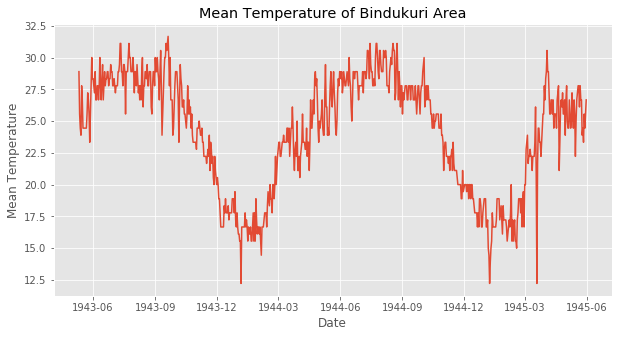

In [106]:
# Mean temperature of Bindikuri area
plt.figure(figsize=(10,5))
plt.plot(weather_bin.Date,weather_bin.MeanTemp)
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.show()

# lets create time series from weather 
timeSeries = weather_bin.loc[:, ["Date","MeanTemp"]]
timeSeries.index = timeSeries.Date
ts = timeSeries.drop("Date",axis=1)

C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning:

pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=6,center=False).mean()

C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning:

pd.rolling_std is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=6,center=False).std()



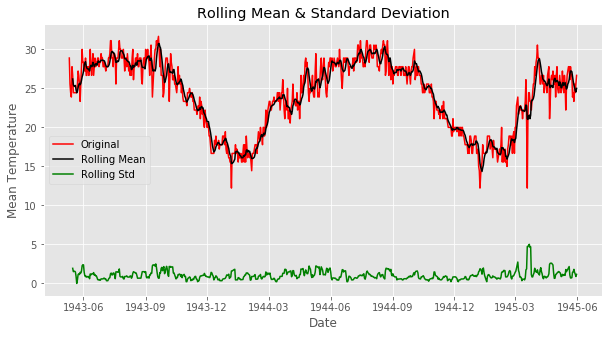

Test statistic:  -1.4095966745887676
p-value:  0.5776668028526396
Critical Values: {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


In [108]:
# adfuller library 
from statsmodels.tsa.stattools import adfuller
# check_adfuller
def check_adfuller(ts):
    # Dickey-Fuller test
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('p-value: '  ,result[1])
    print('Critical Values:' ,result[4])
# check_mean_std
def check_mean_std(ts):
    #Rolling statistics
    rolmean = pd.rolling_mean(ts, window=6)
    rolstd = pd.rolling_std(ts, window=6)
    plt.figure(figsize=(10,5))   
    orig = plt.plot(ts, color='red',label='Original')
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
# check stationary: mean, variance(std)and adfuller test
check_mean_std(ts)
check_adfuller(ts.MeanTemp)

C:\Users\Martin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=6,center=False).mean()



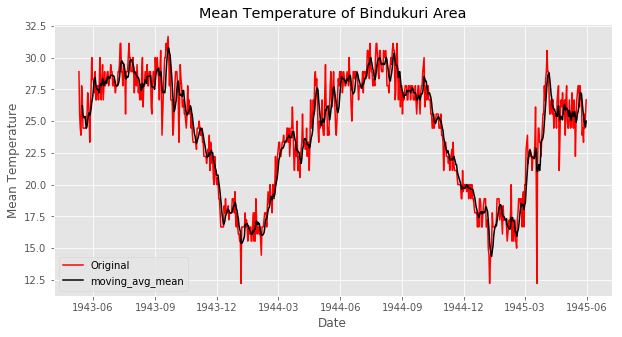

In [111]:
# Moving average method
window_size = 6
moving_avg = pd.rolling_mean(ts,window_size)
plt.figure(figsize=(10,5))
plt.plot(ts, color = "red",label = "Original")
plt.plot(moving_avg, color='black', label = "moving_avg_mean")
plt.title("Mean Temperature of Bindukuri Area")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()